In [1]:
print("Lecture-7")

Lecture-7


### Örnek

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("car_price_prediction_.csv")

In [4]:
df.head()

,Car ID,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Price,Model
0,1,Tesla,2016,2.3,Petrol,Manual,114832,New,26613.92,Model X
1,2,BMW,2018,4.4,Electric,Manual,143190,Used,14679.61,5 Series
2,3,Audi,2013,4.5,Electric,Manual,181601,New,44402.61,A4
3,4,Tesla,2011,4.1,Diesel,Automatic,68682,New,86374.33,Model Y
4,5,Ford,2009,2.6,Diesel,Manual,223009,Like New,73577.10,Mustang


In [6]:
df.shape

(2500, 10)

In [7]:
df.isnull().sum()

Car ID          0
Brand           0
Year            0
Engine Size     0
Fuel Type       0
Transmission    0
Mileage         0
Condition       0
Price           0
Model           0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Car ID        2500 non-null   int64  
 1   Brand         2500 non-null   object 
 2   Year          2500 non-null   int64  
 3   Engine Size   2500 non-null   float64
 4   Fuel Type     2500 non-null   object 
 5   Transmission  2500 non-null   object 
 6   Mileage       2500 non-null   int64  
 7   Condition     2500 non-null   object 
 8   Price         2500 non-null   float64
 9   Model         2500 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 195.4+ KB


In [9]:
df.isna().sum()

Car ID          0
Brand           0
Year            0
Engine Size     0
Fuel Type       0
Transmission    0
Mileage         0
Condition       0
Price           0
Model           0
dtype: int64

In [10]:
df.describe()

,Car ID,Year,Engine Size,Mileage,Price
count,2500.00000,2500.0000,2500.000000,2500.000000,2500.000000
mean,1250.50000,2011.6268,3.465240,149749.844800,52638.022532
std,721.83216,6.9917,1.432053,87919.952034,27295.833455
min,1.00000,2000.0000,1.000000,15.000000,5011.270000
25%,625.75000,2005.0000,2.200000,71831.500000,28908.485000
50%,1250.50000,2012.0000,3.400000,149085.000000,53485.240000
75%,1875.25000,2018.0000,4.700000,225990.500000,75838.532500
max,2500.00000,2023.0000,6.000000,299967.000000,99982.590000


<Axes: >

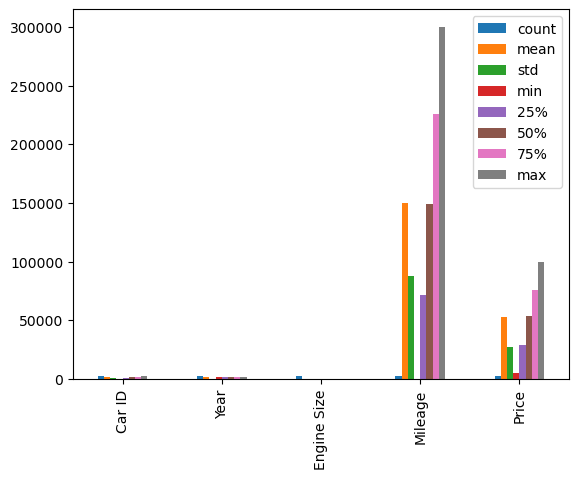

In [11]:
df.describe().T.plot(kind='bar')

In [13]:
df.columns.tolist()

['Car ID',
 'Brand',
 'Year',
 'Engine Size',
 'Fuel Type',
 'Transmission',
 'Mileage',
 'Condition',
 'Price',
 'Model']

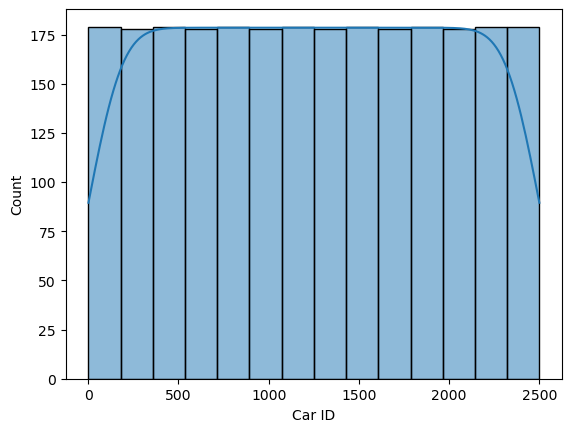

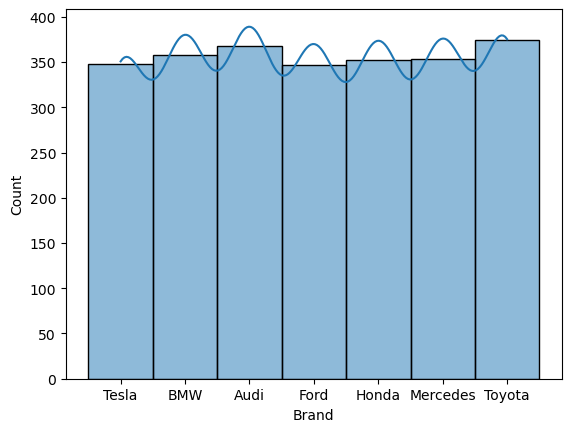

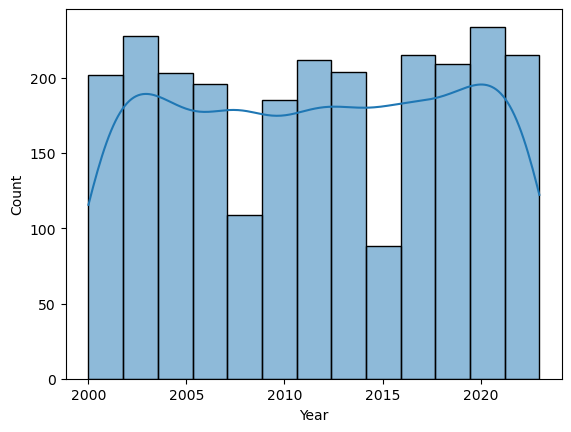

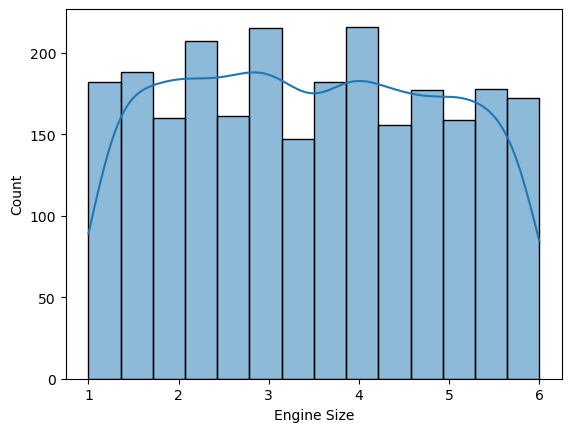

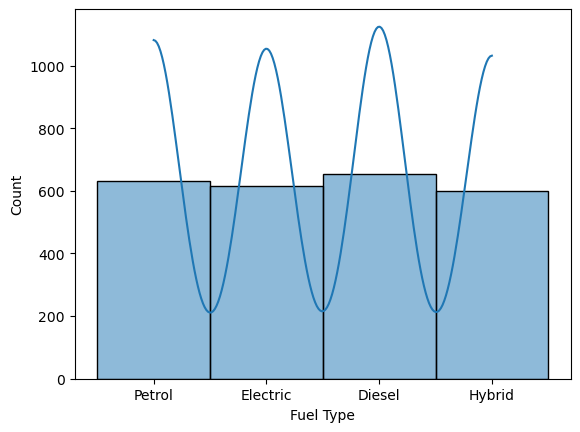

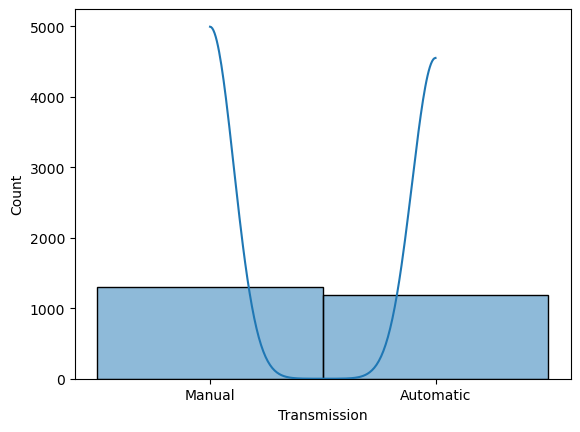

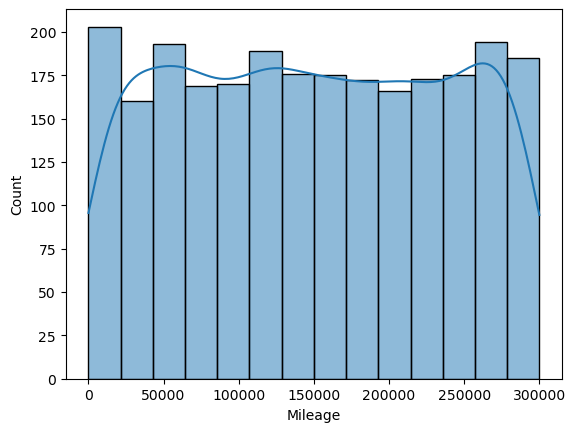

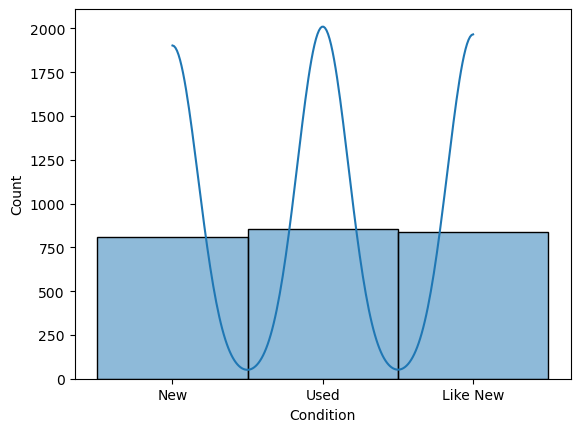

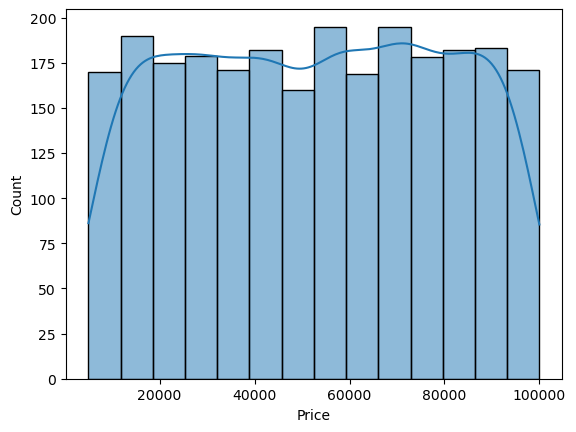

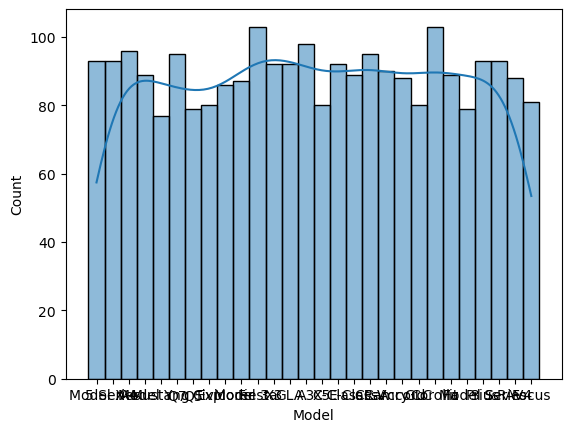

In [16]:
for col in df:
    sns.histplot(x=col, data=df, kde=True)
    plt.show()

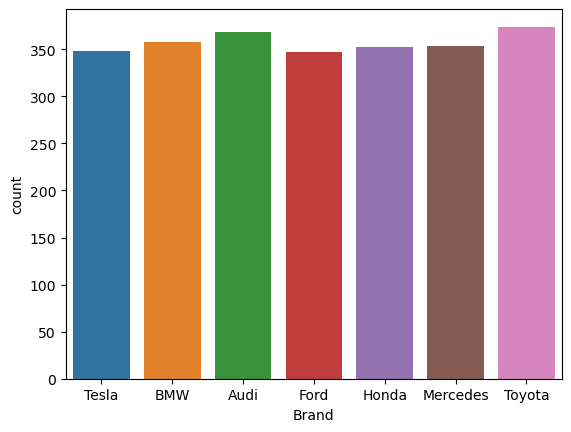

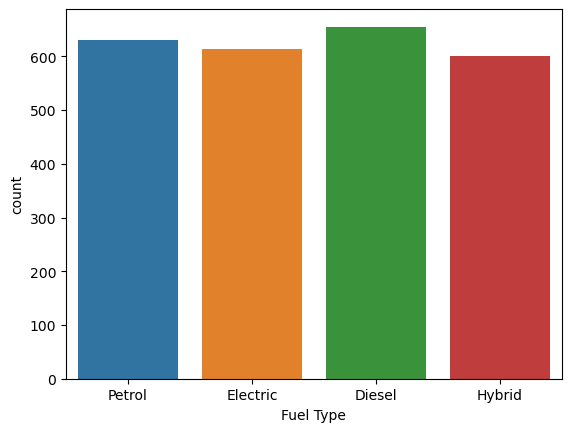

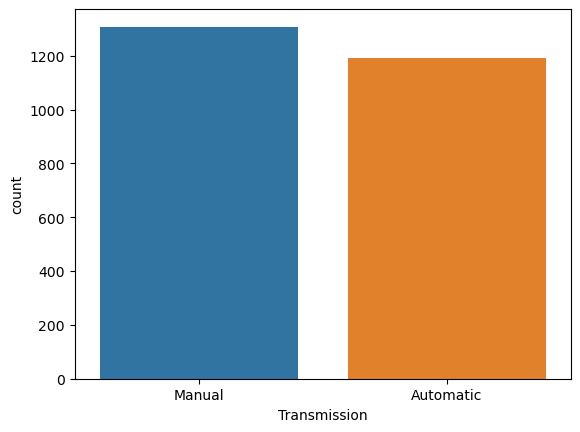

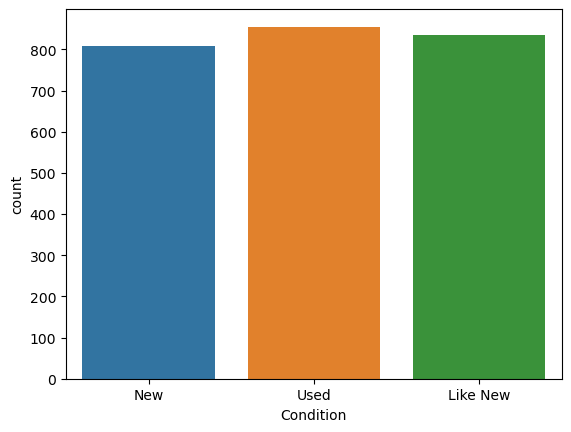

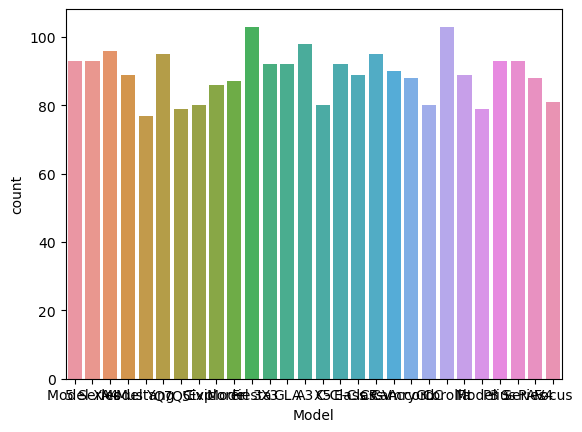

In [19]:
for col in df:
    if df[col].dtype == 'O':
        sns.countplot(x=col, data=df)
        plt.show()

In [20]:
# plotly.express 

## Kategorik (Nominal) ve Sıralı (Ordinal) Verilerin Sayısal Biçime Dönüştürülmesi

Veri biliminde ve makine öğrenmesinde pek çok yöntem ve algoritma kategorik ve sıralı veriler üzerinde doğrudan işlem yapamamaktadır. Bu nedenle önce kategorik ve sıralı verilerin sayısal biçime dönüştürülmeleri gerekir. 

Kateogrik verilerin sayısal biçime dönüştrülmesi tipik olarak her bir kategori için 0'dan itibaren artan sırada bir sayı karşılık getirilerek yapılmaktadır.

Renk Tercihi
--------------
Mavi
Kırmızı
Mavi
Yeşil
Kırmızı
Mavi
Kırmızı
Yeşil
...

Mavi = 0, Kırmızı = 1, Yeşil = 2 biçiminde renklere 0'dan itibaren bir sayı karşı getirelim.

Renk Tercihi
------------------
0
1
0
2
1
0
1
2

Bu işlem en kolay olarak sklearn kütüphanesindeki LabelEncoder sınıf ile yapılabilir. Bu sınıf sklearn.preprocessing paketi içerisindedir. 

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

fit isimli metodu var. Bu metod kategorik ölçekteki değerleri alır. Sınıfın transform metodu da dönüştürülecek kategorik değerleri 0'dan itibaren sayısal değerlere dönüştürmektedir.

In [21]:
from sklearn.preprocessing import LabelEncoder

data = ['mavi', 'kırmızı', 'mavi', 'yeşil', 'beyaz', 'yeşil', 'kırmızı']
le = LabelEncoder()
le.fit(data)
result = le.transform(data)

print(data)
print(result)
print(le.classes_)

['mavi', 'kırmızı', 'mavi', 'yeşil', 'beyaz', 'yeşil', 'kırmızı']
[2 1 2 3 0 3 1]
['beyaz' 'kırmızı' 'mavi' 'yeşil']


Fit metodu bizden kategorik ölçek değerlerini almış, transform ise bunları dönüştürmüştür. 

beyaz 0
kırmızı 1
mavi 2
yeşil 3



In [22]:
from sklearn.preprocessing import LabelEncoder

data = ['mavi', 'kırmızı', 'mavi', 'yeşil', 'beyaz', 'yeşil', 'kırmızı']
le = LabelEncoder()
result = le.fit_transform(data)

print(data)
print(result)
print(le.classes_)

['mavi', 'kırmızı', 'mavi', 'yeşil', 'beyaz', 'yeşil', 'kırmızı']
[2 1 2 3 0 3 1]
['beyaz' 'kırmızı' 'mavi' 'yeşil']


LabelEncoder sınıfıyla yapılan dönüştürmdede hangi kategorik değerin hangi sayıyla ifade edileceğini biz belirleyememekteyiz. numpy.unique. Kategoriler alfabetik olarak sıraya dizilten sonra oranlara numaralar atanmış oluyor.

In [23]:
from sklearn.preprocessing import LabelEncoder

data = ['mavi', 'kırmızı', 'mavi', 'yeşil', 'beyaz', 'yeşil', 'kırmızı']
le = LabelEncoder()
le.fit(data)

transformed_data = [1, 1, 2, 2, 0, 1]
result = le.inverse_transform(transformed_data)

print(result)


['kırmızı' 'kırmızı' 'mavi' 'mavi' 'beyaz' 'kırmızı']


In [24]:
# Elimizde plaka listesi olsun.

le = LabelEncoder()
data = [34, 26, 37, 34, 6, 77, 10, 16, 35, 34, 6]
result = le.fit_transform(data)

print(data)
print(result)
print(le.classes_)

[34, 26, 37, 34, 6, 77, 10, 16, 35, 34, 6]
[4 3 6 4 0 7 1 2 5 4 0]
[ 6 10 16 26 34 35 37 77]


In [29]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('test.csv')
print(df, end='\n\n')

le = LabelEncoder()
df['Cinsiyet'] = le.fit_transform(df['Cinsiyet'])
print(le.classes_, end='\n\n')
df['Şehir'] = le.fit_transform(df['Şehir'])
print(le.classes_, end='\n\n')
print(df, end='\n\n')
dataset = df.to_numpy()
print(dataset)

"""
Cinsiyet,Kilo,Boy,Şehir
Erkek,85,172,Eskişehir
Kadın,72,170,İzmir
Kadın,65,162,İstanbul
Erkek,92,183,İstanbul
Kadın,62,173,Ankara
Erkek,98,172,İzmir

"""

  Cinsiyet  Kilo  Boy      Şehir
0    Erkek    85  172  Eskişehir
1    Kadın    72  170      İzmir
2    Kadın    65  162   İstanbul
3    Erkek    92  183   İstanbul
4    Kadın    62  173     Ankara
5    Erkek    98  172      İzmir

['Erkek' 'Kadın']

['Ankara' 'Eskişehir' 'İstanbul' 'İzmir']

   Cinsiyet  Kilo  Boy  Şehir
0         0    85  172      1
1         1    72  170      3
2         1    65  162      2
3         0    92  183      2
4         1    62  173      0
5         0    98  172      3

[[  0  85 172   1]
 [  1  72 170   3]
 [  1  65 162   2]
 [  0  92 183   2]
 [  1  62 173   0]
 [  0  98 172   3]]


OrdinalEncoder isimli bir sınıf da vardır. OrdinalEncoder aslında LabelEncoder sınıfının birden çok sütunu aynı anda alarak işlem yapan bir biçimi gibidir. categories_

In [30]:
from sklearn.preprocessing import OrdinalEncoder

data = [['mavi', 'erkek'], ['kırmızı', 'kadın'], ['siyah', 'kadın'], ['mavi', 'kadın'], ['beyaz', 'kadın'], ['yeşil', 'kadın']]

oe = OrdinalEncoder()
result = oe.fit_transform(data)
print(result, end='\n\n')
print(oe.categories_)

[[2. 0.]
 [1. 1.]
 [3. 1.]
 [2. 1.]
 [0. 1.]
 [4. 1.]]

[array(['beyaz', 'kırmızı', 'mavi', 'siyah', 'yeşil'], dtype=object), array(['erkek', 'kadın'], dtype=object)]


In [31]:
data

[['mavi', 'erkek'],
 ['kırmızı', 'kadın'],
 ['siyah', 'kadın'],
 ['mavi', 'kadın'],
 ['beyaz', 'kadın'],
 ['yeşil', 'kadın']]

In [32]:
df = pd.read_csv('test.csv')
print(df, end='\n\n')

oe = OrdinalEncoder()
df[['Cinsiyet', 'Şehir']] = oe.fit_transform(df[['Cinsiyet', 'Şehir']])
print(df, end='\n\n')

  Cinsiyet  Kilo  Boy      Şehir
0    Erkek    85  172  Eskişehir
1    Kadın    72  170      İzmir
2    Kadın    65  162   İstanbul
3    Erkek    92  183   İstanbul
4    Kadın    62  173     Ankara
5    Erkek    98  172      İzmir

   Cinsiyet  Kilo  Boy  Şehir
0       0.0    85  172    1.0
1       1.0    72  170    3.0
2       1.0    65  162    2.0
3       0.0    92  183    2.0
4       1.0    62  173    0.0
5       0.0    98  172    3.0



Aslında kategorik veriler çoğu kez buradaki gibi sayısal biçime dönüştürülmemektedir. Kategorik veirlerin sayıal biçime dönüştürülmesinde skılıkla "one hot encoding" denilen teknik kullanılmaktadır.

## One Hot Encoding

LabelEncoder sınıflarıyla üç kategorik renk değerine Mavi = 0, Yeşil = 1, Sarı = 2 değerlerini atamış olalım. Buradaki Sarı > Yeşil > Mavi gibi bir ilişkinin ya da Mavi + Yeşil = Sarı gibi bir ilişkinin bizim için bir anlamı yoktudur. Ancak pek çok algoritma bu üç renk böyle kodlandığında onların kategorik değil sıralı ölçeğe sahip olduğunu sanmaktadır. İşte kategorik değerlerin sanki onlar sıralı ölçeğe ilişkinmiş gibi değerlendirilmesiin engellemek için "one hot encoding" denilen bir yöntem kullanılmaktadır. "one hot" bir grup bitten yalnızca birinin 1 diğerlerinin 0 olduğunu anlatmak için kullanılan bir deyimdir.

One hot encxoding dönüştürmesinde kategorik veirler ikilik (binary) sistemde kategori sayısı kadar sütunla ifade edilmektedir. Bu yöntemde n kategoriden birini belirten bir veri n tane sütunla ifade edilir. Verinin ilişkin olduğu kateogriyi ilişkin sütun bilgisi 1 diğer sütun bilgileri 0 yapılır.

Tepki Süresi    |   Renk
1.2                 Kırmızı
2.3                 Mavi
0.7                 Kırmızı
1.2                 Yeşil
3.2                 Mavi

---> One hot encoding yaptıktan sonra

Tepki Süresi    |   Kırmızı     |   Mavi    | Yeşil
1.2                 1           |   0
2.3                 0               1
0.7                 1               0
1.2                 0               0
3.2                 0               1

One hot encoding yöntemi ikiden fazla sınıf belirten kategorik veriler için uygulanması gereken bir tekniktir. İki sınıflı kategorik veriler için one hot encoding uygulamaya gerek yoktur. Cinsiyet ikili bir kategorik sınıf oluşturduğundan dolayı bu sütun için bizim one hot encoding uygulamamıza gerek yoktur.

sklearn.preprocessing 

In [42]:
df = pd.read_csv('test.csv')
print(df)

"""
Tepki Süresi,Renk
1.2,Kırmızı
2.3,Mavi
0.7,Kırmızı
1.2,Yeşil
3.2,Mavi
"""

   Tepki Süresi     Renk
0           1.2  Kırmızı
1           2.3     Mavi
2           0.7  Kırmızı
3           1.2    Yeşil
4           3.2     Mavi


In [43]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False) # seyrek matris

transformed_data = ohe.fit_transform(df['Renk'].to_frame())
print(transformed_data)

[[1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]


d:\Anaconda\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [44]:
df.drop(['Renk'], axis=1, inplace=True)
df[['Kırmızı', 'Mavi', 'Yeşil']] = transformed_data
print(df)

   Tepki Süresi  Kırmızı  Mavi  Yeşil
0           1.2      1.0   0.0    0.0
1           2.3      0.0   1.0    0.0
2           0.7      1.0   0.0    0.0
3           1.2      0.0   0.0    1.0
4           3.2      0.0   1.0    0.0


In [45]:
categorical_data = ['Otomobil', 'Kamyon', 'Otomobil', 'Motosiklet', 'Kamyon', 'Motosiklet', 'Kamyon']

df_ohe = pd.get_dummies(categorical_data)
print(df_ohe, end='\n\n')
ohe = df_ohe.to_numpy()
print(ohe)

   Kamyon  Motosiklet  Otomobil
0       0           0         1
1       1           0         0
2       0           0         1
3       0           1         0
4       1           0         0
5       0           1         0
6       1           0         0

[[0 0 1]
 [1 0 0]
 [0 0 1]
 [0 1 0]
 [1 0 0]
 [0 1 0]
 [1 0 0]]


In [46]:
df = pd.read_csv('test.csv')

df_ohe = pd.get_dummies(df[['Renk', 'Araç']])
print(df_ohe, end='\n\n')
ohe = df_ohe.to_numpy()
print(ohe)

   Renk_Kırmızı  Renk_Mavi  Renk_Yeşil  Araç_Kamyon  Araç_Otobüs  \
0             1          0           0            0            0   
1             0          1           0            1            0   
2             1          0           0            0            1   
3             0          0           1            1            0   
4             0          1           0            0            0   
5             0          0           1            0            1   

   Araç_Otomobil  
0              1  
1              0  
2              0  
3              0  
4              1  
5              0  

[[1 0 0 0 0 1]
 [0 1 0 1 0 0]
 [1 0 0 0 1 0]
 [0 0 1 1 0 0]
 [0 1 0 0 0 1]
 [0 0 1 0 1 0]]


In [47]:
df = pd.read_csv('test.csv')

df_ohe = pd.get_dummies(df, prefix_sep='', prefix='', columns=['Renk', 'Araç'])
print(df_ohe, end='\n\n')
ohe = df_ohe.to_numpy()
print(ohe)

   Tepki Süresi  Kırmızı  Mavi  Yeşil  Kamyon  Otobüs  Otomobil
0           1.2        1     0      0       0       0         1
1           2.3        0     1      0       1       0         0
2           0.7        1     0      0       0       1         0
3           1.2        0     0      1       1       0         0
4           3.2        0     1      0       0       0         1
5           6.3        0     0      1       0       1         0

[[1.2 1.  0.  0.  0.  0.  1. ]
 [2.3 0.  1.  0.  1.  0.  0. ]
 [0.7 1.  0.  0.  0.  1.  0. ]
 [1.2 0.  0.  1.  1.  0.  0. ]
 [3.2 0.  1.  0.  0.  0.  1. ]
 [6.3 0.  0.  1.  0.  1.  0. ]]


One hot encoding dönüştürmesi kategorik veriler için iyi sonuçlar doğursa da bazı dezavantajlara sahiptir. Örneğin veri tablosundaki bir sütunun kategori sayısı çok fazla olabilir. Bu durumda one hot encoding çok fazla sütunun tabloya eklenmesine yol açar. Bu tür durumlarda one hot encoding yerine başka bir yöntem tercih edilebilir ya da one hot encoding sonrasında "boyutsal özellik indirgemesi (dimensionality feature reduction)" uygulanabilir. One hot encoding işlemi için tüm kategorilerin sayısı işin başında biliniyor olmas gerekmtekdir. Kategori sayısının çok fazla olduğu durumlarda sıklıkla uygulanan yöntemlerden bir diğeri de "binary encoding" yöntemidir.

## Binary Encoding

